# Data loader demo

In [1]:
import task3.utils.config
import task3.utils.utils
import task3.utils.img_utils
from loguru import logger
import importlib
import sys

## Initialize setup and get the data loader

In [2]:
importlib.reload(sys.modules['task3.utils.config'])
importlib.reload(sys.modules['task3.utils.utils'])
from task3.utils.config import get_data_loader, init

cfg = init(config='configs/default.yaml')

# you'd probably call this in train.py
training_loader, validation_loader, test_loader = get_data_loader(cfg, mode='train', get_subset=False)
submission_loader = get_data_loader(cfg, mode='submission', get_subset=False)

dict_keys(['name', 'video', 'box', 'label', 'frames', 'dataset'])
2021-12-29T12:05:32.253900+0100 DEBUG Loaded samples: ['DY7ASN54S9', 'GC4N2W3CPZ', 'T8KF3Q2B2F', 'DTKPN7XP6M', 'K3AM1YOI38', 'QPQSQTSI7D', 'D29HWPRZUW', 'QFGAOZX5JI', 'RC4B5W3ATB', '8G7XRFIWB3', 'LDBF4IFZ6H', 'AYPVNPO9R0', 'ZSLPMQEWOY', 'FIW33CVMV0', 'IJZFZ2P3UT', '7V9NY3JFPX', 'YTEBHX6SH5', '5NJTVZ6ZOJ', '7IBG80WR2T', 'VVCUF1AI87', 'R5OV0RKYDG', 'YSCCEISFRH', 'MW16WM2HPQ', '1D7PVKV2AP', '8AHY2IWS17', '4XBC2X5ZTR', 'D47OR19ANJ', 'T2LZGPQNQI', 'VI47TJR3OQ', 'GF7SRBBU1E', '2O92K3GBLM', '0S1GBHENTP', 'M1FI0BAOWB', 'O26IJHI6MH', 'IJN60PIITZ', 'XBTT6NEY4T', 'D8I212VOCH', '6I8D4BKPUE', 'IMNKTJV3OI', 'GFOJ0HGKZH', 'YF6QEAWJXY', 'DMKG04F0SB', 'BBB0U709D2', 'C6WKLGHUIM', '3YLPDRY0FA', '4W4P3UREMQ', '11NZLRCO13', 'QZA3WA0E2X', 'R82Q2AL9P7', '1XHV0Q88M5', 'E9AHVWGBUF', 'WO0OOZLXP6', 'ZMJIDN442P', 'OYZFKJR8U3', '3DGDHONGJW', 'YEZ7BPLZW0', 'W00G0Q112W', 'JANFS05F33', 'ONA22CCCFQ', 'EH667Z5JMT', '55M79ZANVX', 'H7G0BX4HFV', '571G03ZYDA

## Visualize data

In [3]:
# Get and visualize a batch of training data
train_batch = next(iter(training_loader))
val_batch = next(iter(validation_loader))
test_batch = next(iter(test_loader)) if test_loader is not None else None
submission_batch = next(iter(submission_loader))

batches = {
    'train': train_batch,
    'val': val_batch,
    'test': test_batch,
    'submission': submission_batch,
}

2021-12-29T12:19:32.725881+0100 DEBUG "train" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig', 'dataset', 'box_mask_props', 'label_cropped'])
2021-12-29T12:19:32.726738+0100 DEBUG Shape of batch frames: torch.Size([8, 1, 40, 40]); shape of batch labels torch.Size([8, 1, 40, 40])
2021-12-29T12:19:32.727807+0100 DEBUG {'top_left': (46, 44), 'bottom_right': (85, 83), 'box_dims': (39, 39), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (66, 64), 'mask_dims': (750, 1020)}
(112, 112)
2021-12-29T12:19:32.730728+0100 DEBUG {'top_left': (42, 45), 'bottom_right': (84, 87), 'box_dims': (42, 42), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (63, 66), 'mask_dims': (750, 1020)}
(112, 112)
2021-12-29T12:19:32.732659+0100 DEBUG {'top_left': (244, 304), 'bottom_right': (409, 469), 'box_dims': (165, 165), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (326, 386), 'mask_dims': (750, 1020)}
(583, 796)
2021-12-29T12:19:32.735775+01

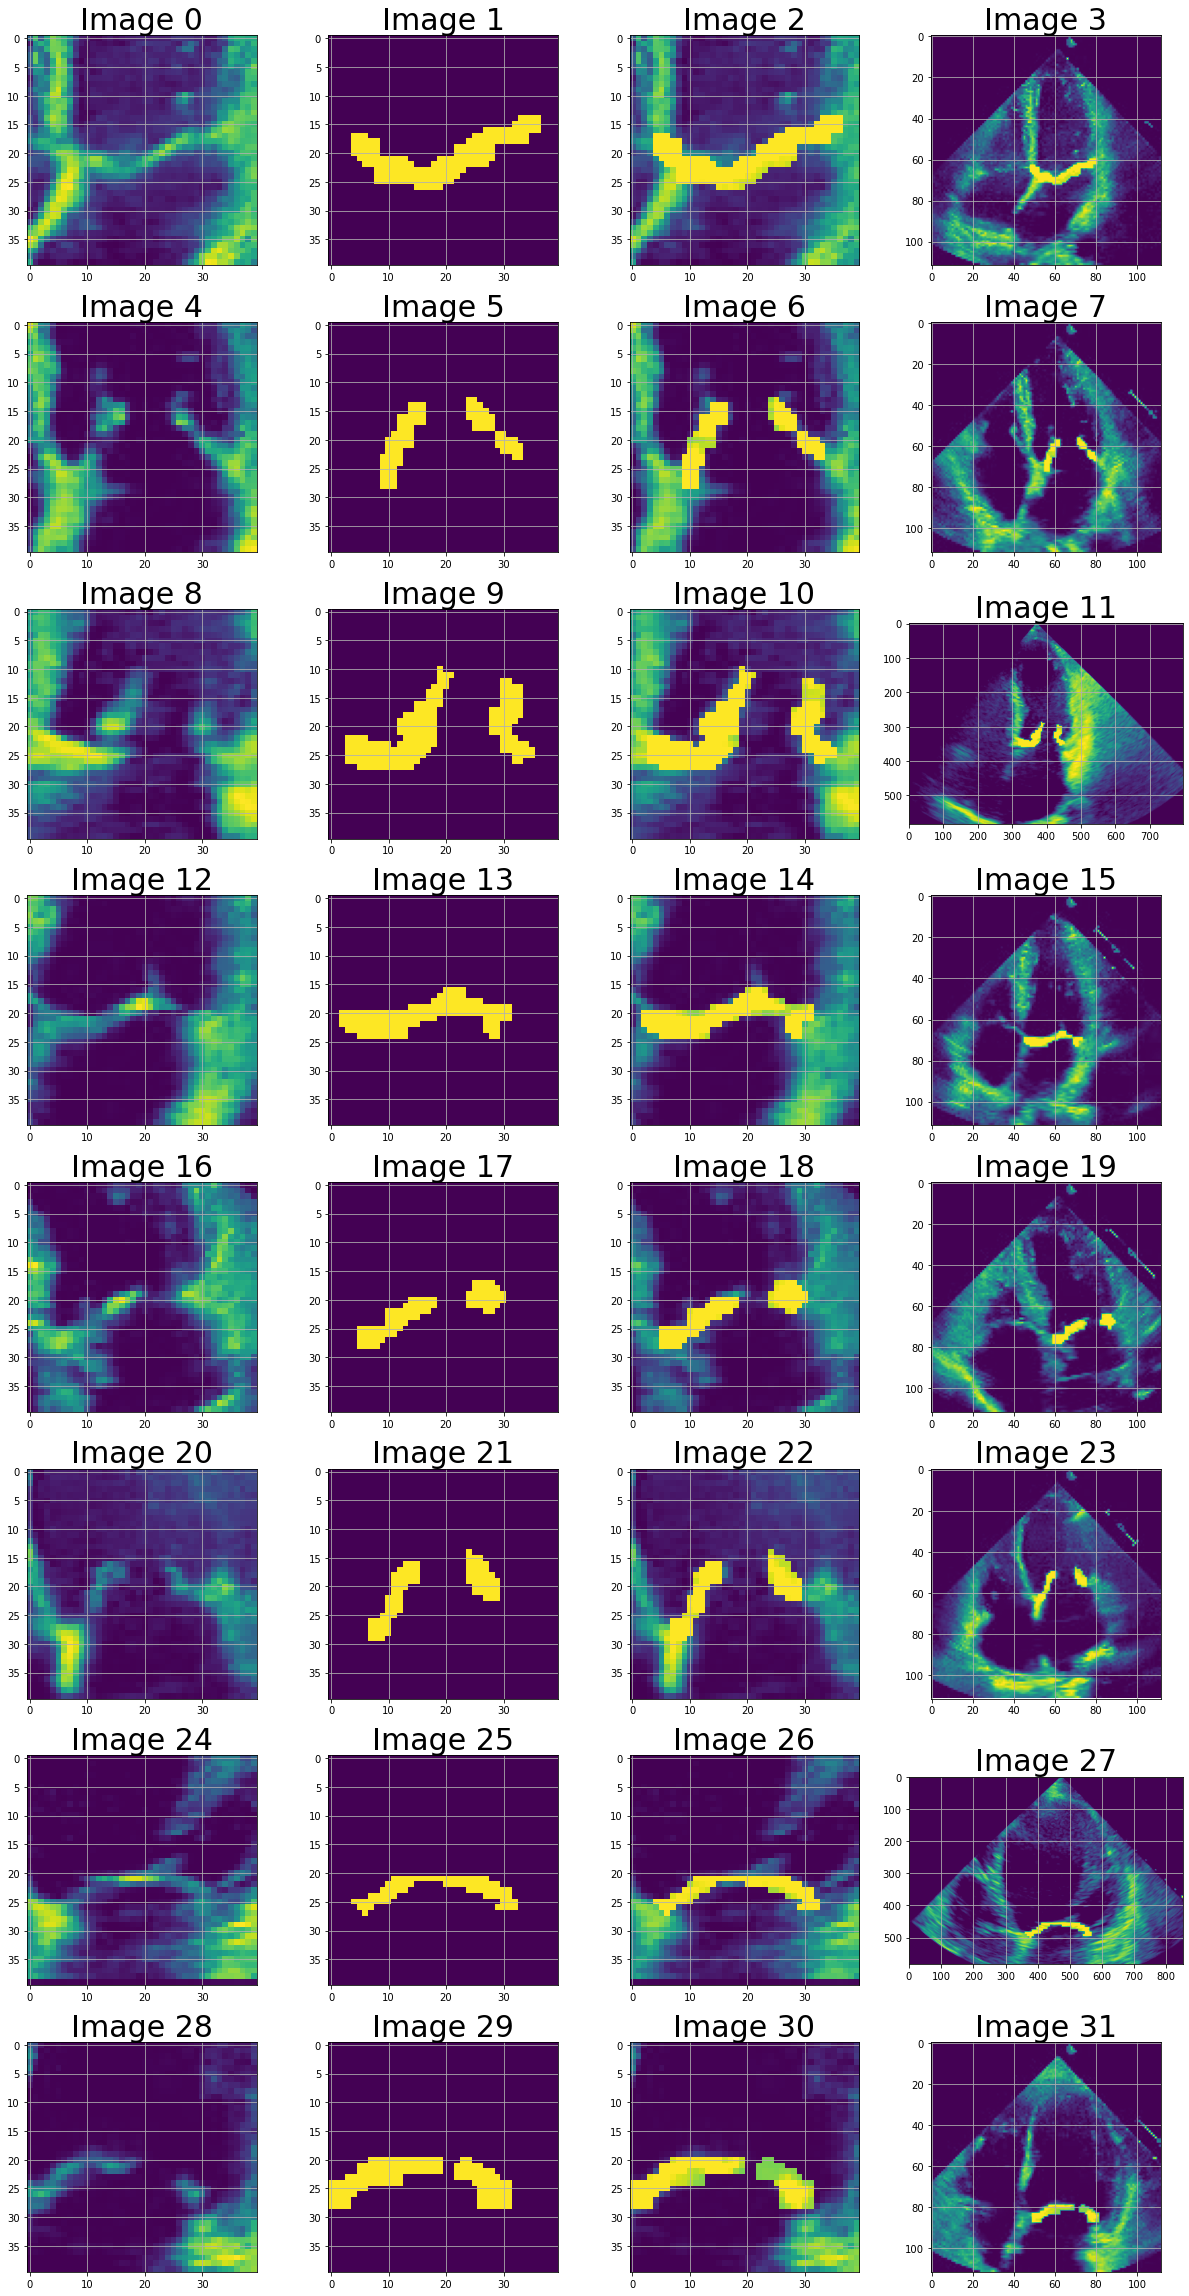

2021-12-29T12:19:34.845687+0100 DEBUG "val" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig', 'dataset', 'box_mask_props', 'label_cropped'])
2021-12-29T12:19:34.846064+0100 DEBUG Shape of batch frames: torch.Size([8, 1, 40, 40]); shape of batch labels torch.Size([8, 1, 40, 40])
2021-12-29T12:19:34.846469+0100 DEBUG {'top_left': (45, 52), 'bottom_right': (91, 98), 'box_dims': (46, 46), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (68, 75), 'mask_dims': (750, 1020)}
(112, 112)
2021-12-29T12:19:34.847538+0100 DEBUG {'top_left': (34, 50), 'bottom_right': (78, 94), 'box_dims': (44, 44), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (56, 72), 'mask_dims': (750, 1020)}
(112, 112)
2021-12-29T12:19:34.848511+0100 DEBUG {'top_left': (55, 44), 'bottom_right': (107, 96), 'box_dims': (52, 52), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (81, 70), 'mask_dims': (750, 1020)}
(112, 112)
2021-12-29T12:19:34.849377+0100 DEBUG 

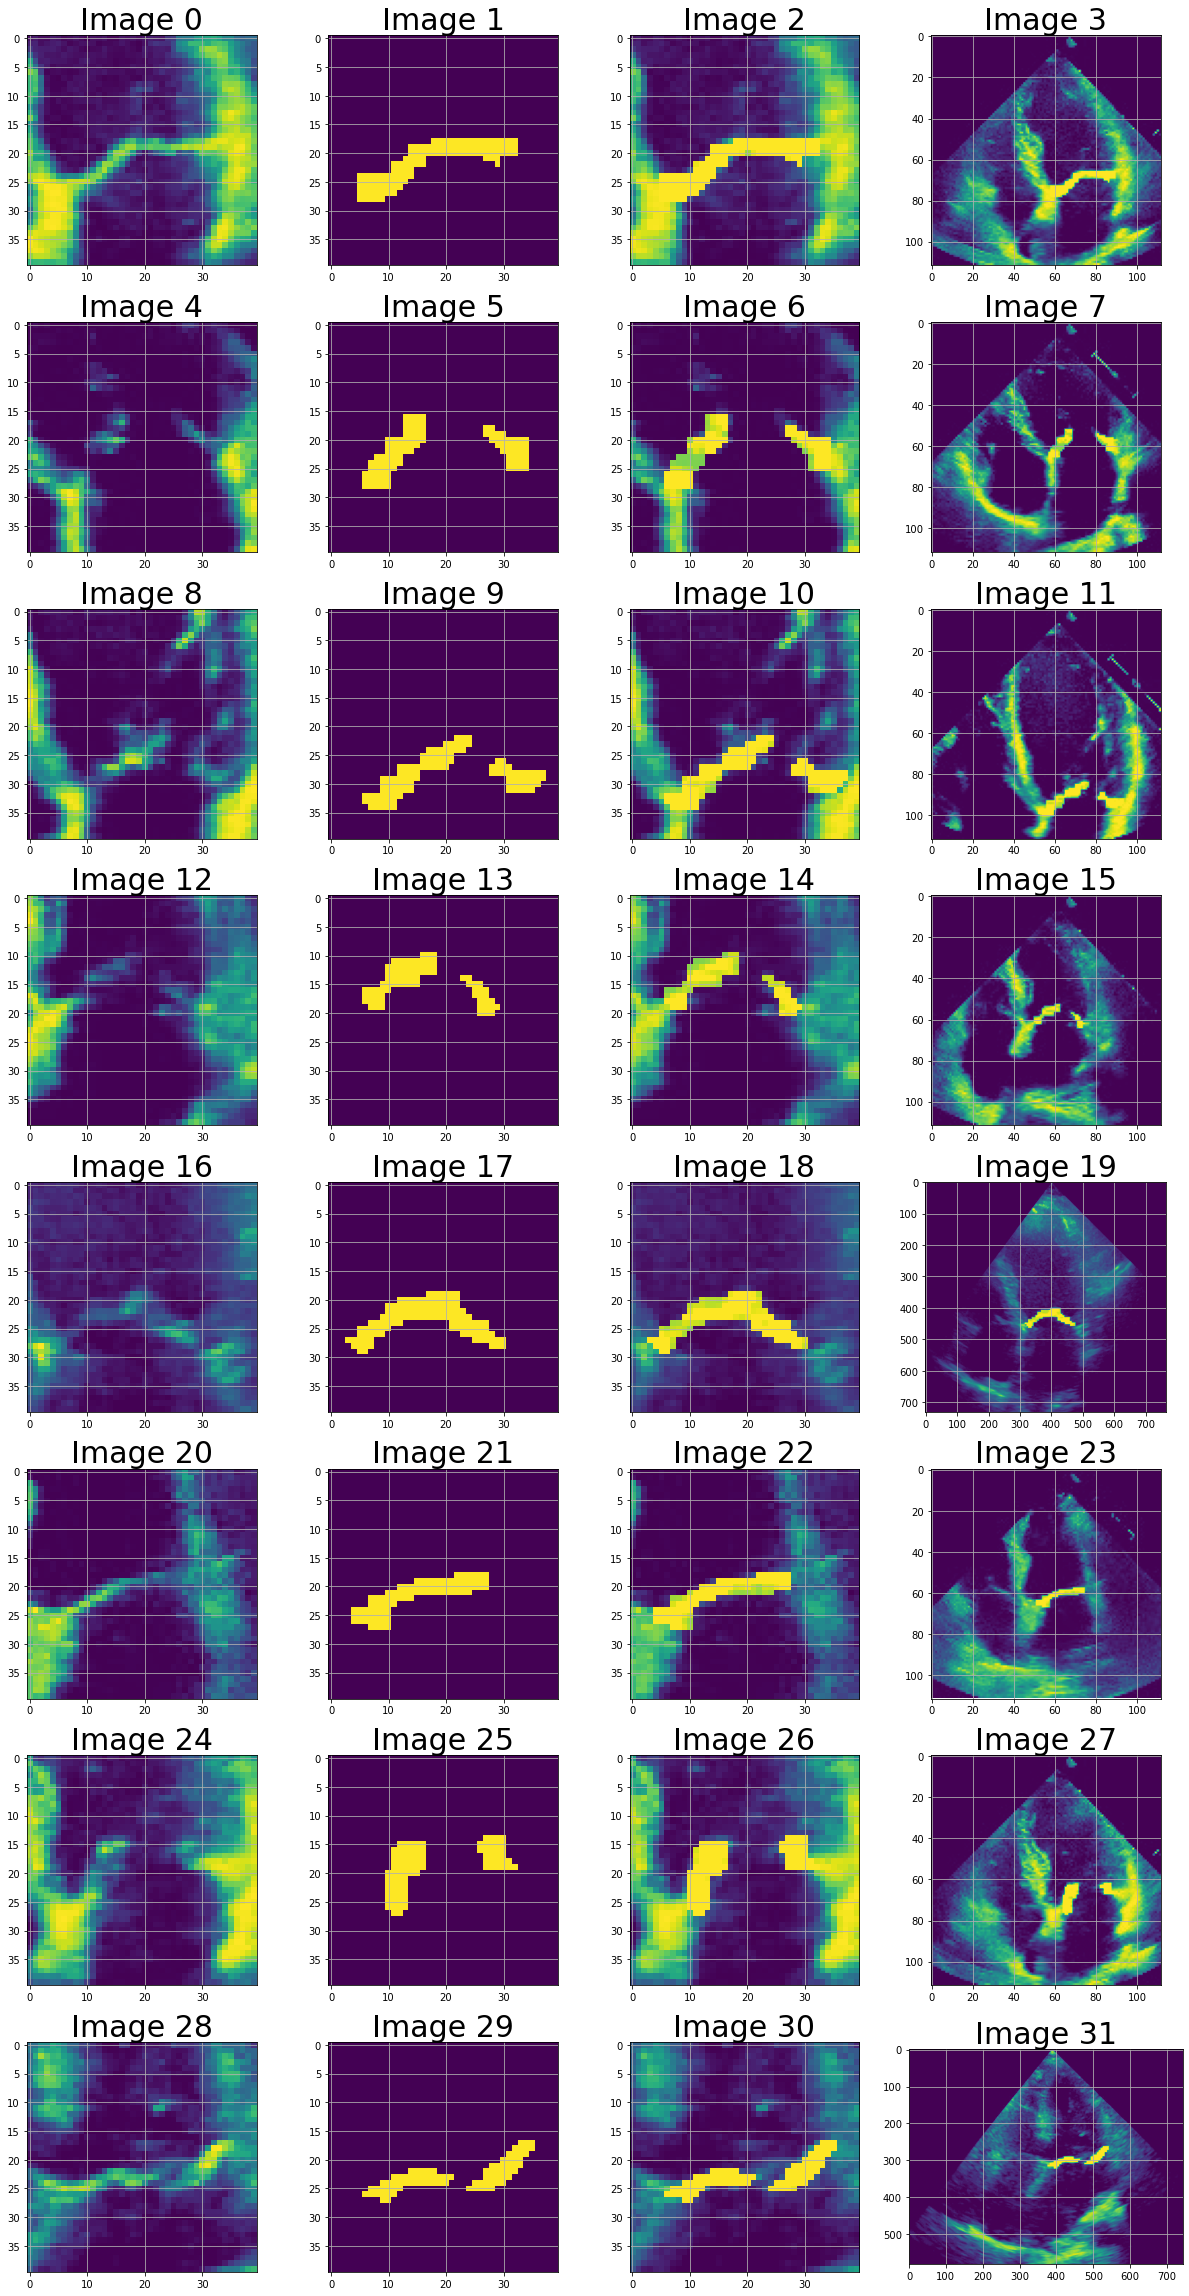

2021-12-29T12:19:36.863935+0100 INFO "test" batch empty or invalid, skipping visualizaton
2021-12-29T12:19:36.864307+0100 DEBUG "submission" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig'])
2021-12-29T12:19:36.864726+0100 DEBUG Shape of batch frames: torch.Size([1, 1, 40, 40]); shape of batch labels None


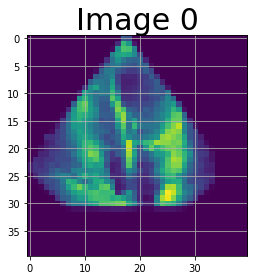

In [10]:
importlib.reload(sys.modules['task3.utils.img_utils'])
from task3.utils.img_utils import show_img_batch

for name, batch in batches.items():
    if type(batch) is dict:
        logger.debug('"{}" batch keys: {}', name, batch.keys())
        show_img_batch(batch, include_upscaled_labels=True)
    else:
        logger.info('"{}" batch empty or invalid, skipping visualizaton', name)
